In [23]:
import requests
from bs4 import BeautifulSoup as bs
import re
import spacy
import nltk
from gensim.corpora import Dictionary
from gensim.matutils import corpus2csc
import numpy as np
import pickle
from importlib import reload
import ppmi_svd
reload(ppmi_svd)
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches

In [57]:
main_text_dict = pickle.load(open("../data/tlp_main_text_dict.pickle", "rb"))
dct = pickle.load(open("../data/tlp_dct.pickle", "rb"))
corpus = pickle.load(open("../data/tlp_corpus.pickle", "rb"))
freqs = pickle.load(open("../data/tlp_freqs.pickle", "rb"))
word_tag_dict = pickle.load(open("tlp_word_tag_dict.pickle", "rb"))


In [3]:
term_doc_mat = corpus2csc(corpus)
cooc = np.dot(term_doc_mat, term_doc_mat.T)

In [4]:
# coocurrence calculator
target1, target2 = "case", "fact"
cooc[dct.token2id[target1],dct.token2id[target2]]

4.0

In [25]:
cooc, vocabulary, pmi_matrix, word_vectors_df, pmi_svd_cos = ppmi_svd.from_bows_to_embeddings(corpus, dct)#reload(uf)

In [56]:
word_vectors_df.index

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
case,3.326070,-1.559538,-0.824553,-0.750983,1.797494,-0.934235,0.315112,-0.691752,0.162943,-0.099181,...,-0.038461,-0.025943,-0.319766,-0.103818,-0.008638,-0.204430,-0.100968,-0.081159,-0.159336,-0.055572
world,5.647022,1.336850,1.417889,-0.362186,-1.208221,-1.042096,1.105031,1.069518,0.903587,1.511251,...,0.070723,-0.023407,0.166206,0.247343,0.093630,-0.218059,-0.015184,-0.221115,0.185280,-0.132641
fact,7.535059,1.738870,0.383342,1.890694,0.887297,-1.796169,-0.559905,1.465491,-0.028798,-0.363601,...,-0.040381,0.014211,0.093246,-0.023410,-0.102329,0.193700,-0.018473,-0.319578,0.181372,-0.128026
thing,5.969552,2.591463,0.833069,-0.150291,0.096627,-1.151586,0.170196,1.279218,-0.200839,-0.963831,...,-0.352729,0.090876,0.098257,0.041299,-0.280455,0.306422,0.407246,0.576585,-0.450668,0.184681
totality,2.034501,0.533217,0.970451,0.822460,-0.178904,-0.544477,-0.092552,-0.367211,0.252963,0.110599,...,0.039859,-0.242254,0.238873,-0.491798,-0.125909,-0.126195,-0.219937,0.034301,0.039493,0.151997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
unsatisfying,0.333513,-0.088923,0.140050,-0.161743,-0.075745,-0.203490,0.160202,-0.373397,0.080167,0.012824,...,-0.065591,0.084262,0.034911,-0.028602,-0.021412,-0.079783,-0.117572,0.077274,0.050904,0.159327
climb,0.409871,-0.113810,-0.077126,-0.181552,-0.005402,-0.108929,-0.152854,-0.236137,0.177368,-0.234911,...,-0.144119,-0.203700,-0.210690,-0.100356,0.276352,-0.261020,0.232592,-0.135279,-0.095856,0.183484
elucidatory,0.359580,-0.198642,-0.092683,-0.121101,0.064496,-0.058089,-0.147847,-0.219337,0.157109,-0.178605,...,-0.126813,-0.095485,-0.093259,-0.021843,0.103333,-0.198816,-0.005821,-0.100716,-0.078760,0.109482
ladder,0.077472,0.074438,0.008176,-0.077541,-0.071308,-0.061457,-0.020412,-0.042566,0.039499,-0.081789,...,-0.049862,-0.158134,-0.139469,-0.106227,0.266246,-0.079863,0.283172,-0.079051,-0.024687,0.104779


In [27]:
xs, ys, words = ppmi_svd.get_tsne_coors(word_vectors_df)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


In [39]:
xs.max()

1.0

In [83]:
topn = 150
words_topn = [tup[0] for tup in freqs][:topn]
words_topn

['proposition',
 'fact',
 'form',
 'sign',
 'logical',
 'truth',
 'world',
 'picture',
 'object',
 'say',
 'logic',
 'have',
 'be',
 'sense',
 'elementary',
 'thing',
 'express',
 'atomic',
 'give',
 'true',
 'relation',
 'mean',
 'same',
 'possibility',
 'general',
 'operation',
 'number',
 'existence',
 'way',
 'reality',
 'law',
 'know',
 'expression',
 'show',
 'different',
 'common',
 'follow',
 'other',
 'represent',
 'name',
 'symbol',
 'possible',
 'clear',
 'property',
 'function',
 'language',
 'case',
 'make',
 'meaning',
 'formal',
 'variable',
 'propositional',
 'order',
 'question',
 'concept',
 'speak',
 'state',
 'affair',
 'false',
 'present',
 'description',
 'such',
 'assert',
 'primitive',
 'rule',
 'occur',
 'internal',
 'understand',
 'Russell',
 'tautology',
 'space',
 'thought',
 'value',
 'result',
 'construct',
 'definite',
 'call',
 'totality',
 'determine',
 'contain',
 'describe',
 'stand',
 'signify',
 'do',
 'method',
 'term',
 'part',
 'word',
 'place',


In [84]:
kfi_color = "#00b6d7"
tag_color_dict = {
    "NOUN" : kfi_color,
    "VERB" : "black",
    "ADJ" : "gray",
    "PROPN" : "darkblue"
}

In [85]:
word_size_dict = dict([(k, np.round(np.log2(v))) for k,v in freqs])

In [86]:
word_color_dict = {}
for k,v in word_tag_dict.items():
    word_color_dict[k] = tag_color_dict[v]

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


(0.1, 0.9, 0.1, 0.9)

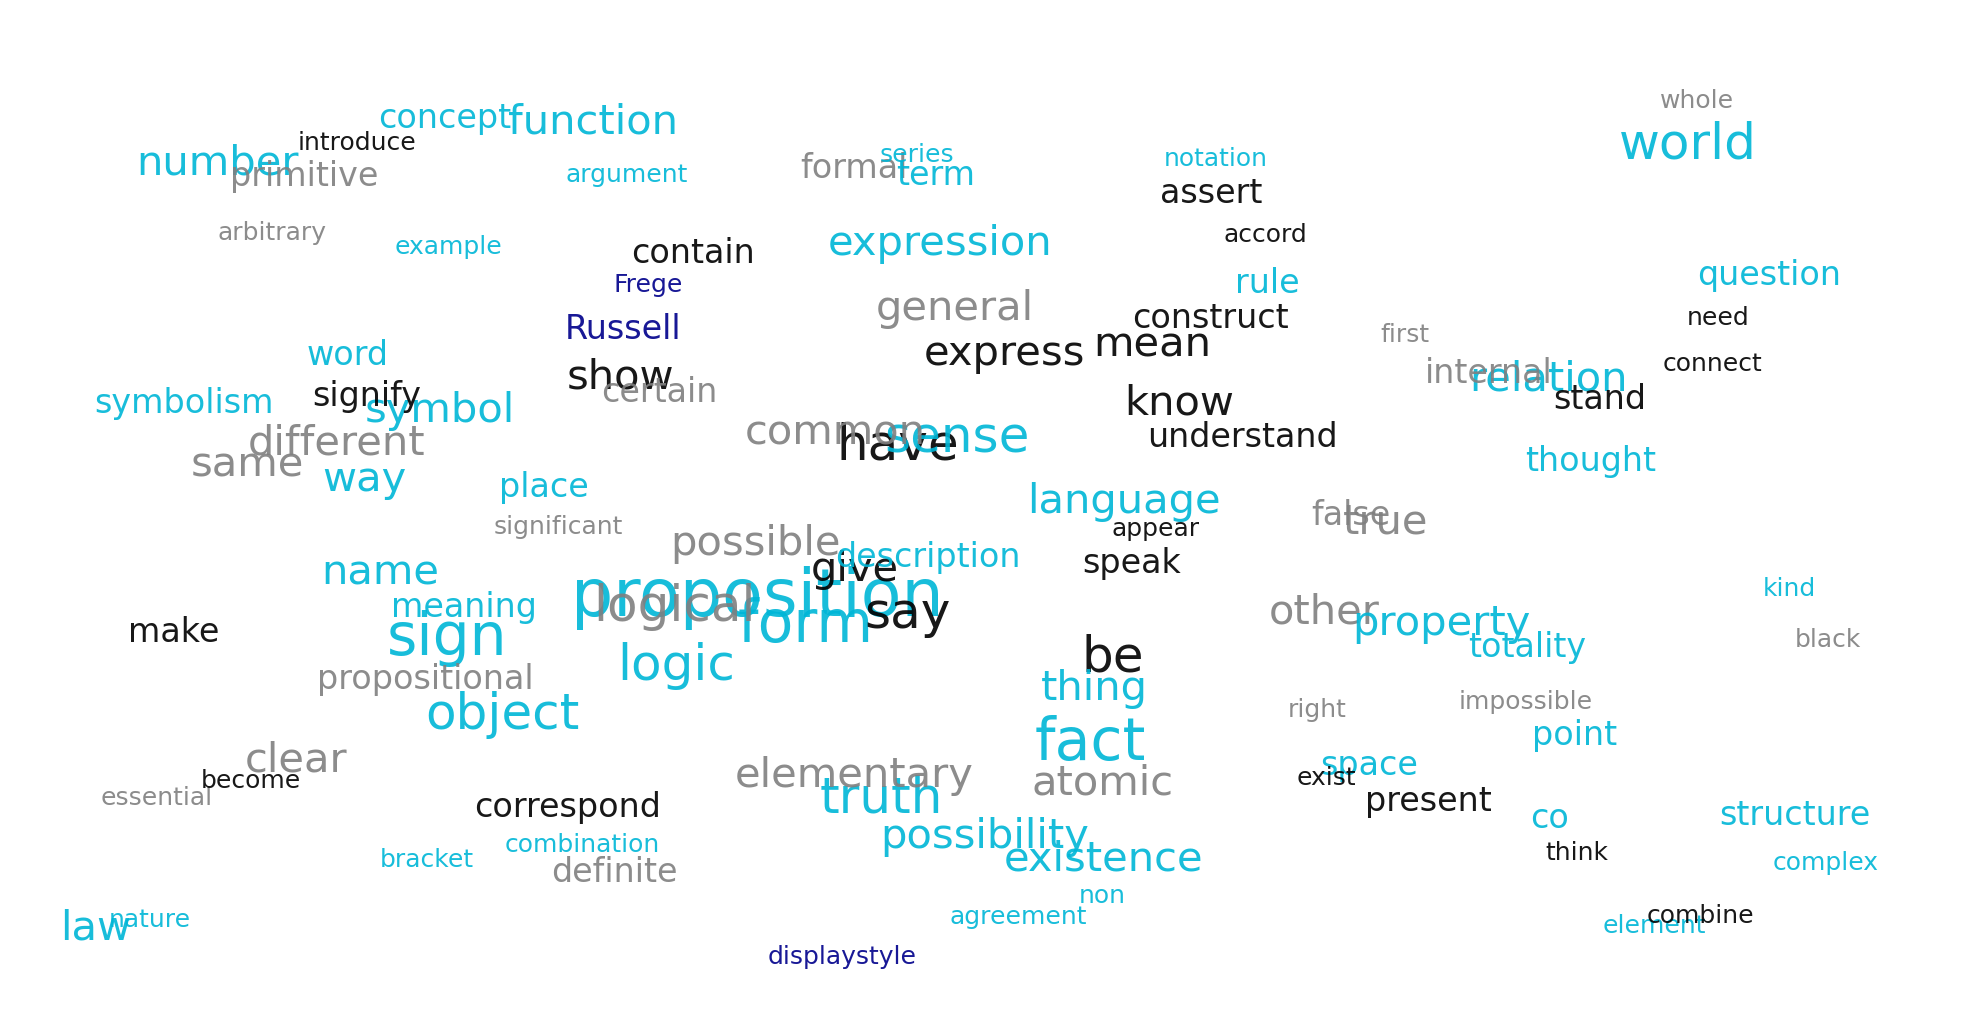

In [87]:
xs, ys, words = ppmi_svd.get_tsne_coors(word_vectors_df.loc[words_topn], perplexity=15)

fig, ax = plt.subplots(1,1, figsize=(3.96, 2), dpi=600)
cutoff = 0.1

for x, y, word in zip(xs, ys, words):
    if (cutoff <= x <= 1-cutoff) and (cutoff <= y <= 1-cutoff):
        ax.text(x, y, word, horizontalalignment='center', fontsize=word_size_dict[word], color=word_color_dict[word], alpha=0.9)
ax.set_xlim(cutoff, 1-cutoff)
ax.set_ylim(cutoff, 1-cutoff)
ax.axis("off")


In [88]:
fig.savefig("../figures/tlp_embeddings_v1.png")